In [1]:
!pip install easyocr
!pip install imutils

  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB 1.4 MB/s eta 0:00:03
   - -------------------------------------- 0.1/2.9 MB 770.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.9 MB 656.4 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.9 MB 860.2 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/2.9 MB 927.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.4/2.9 MB 1.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/2.9 MB 933.2 kB/s eta 0:00:03
   ------ --------------------------------- 0.4/2.9 MB 949.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.5/2.9 MB 983.0 kB/s eta 0:00:03
   ------- -------------------------------- 0.6/2.9 MB 992.2 kB/s eta 0:00:03
   -------- --------------------

   --------------------------------- ------ 166.0/198.6 MB 2.1 MB/s eta 0:00:16
   --------------------------------- ------ 166.1/198.6 MB 2.1 MB/s eta 0:00:16
   --------------------------------- ------ 166.2/198.6 MB 2.1 MB/s eta 0:00:16
   --------------------------------- ------ 166.3/198.6 MB 2.1 MB/s eta 0:00:16
   --------------------------------- ------ 166.5/198.6 MB 2.1 MB/s eta 0:00:16
   --------------------------------- ------ 166.6/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 166.7/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 166.8/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 166.9/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 167.0/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 167.1/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ------ 167.2/198.6 MB 2.1 MB/s eta 0:00:15
   --------------------------------- ---

In [2]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


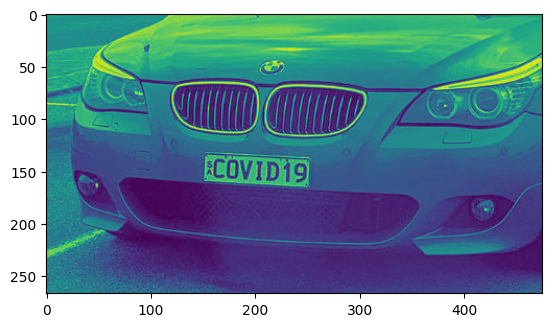

In [5]:
img = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

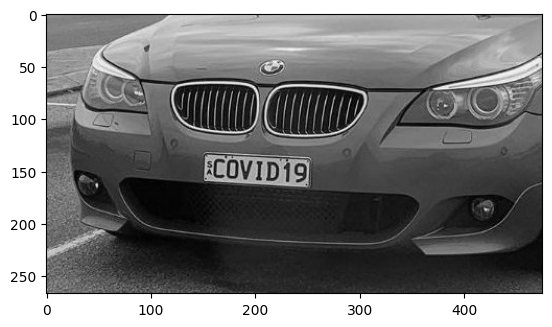

In [3]:
img = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

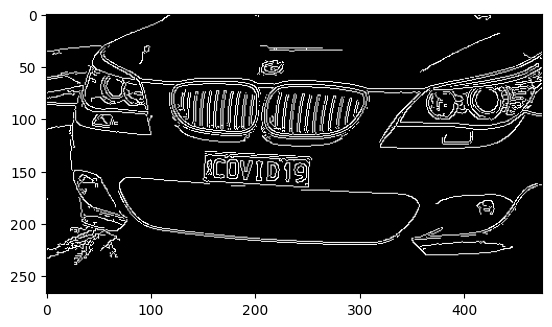

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [9]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

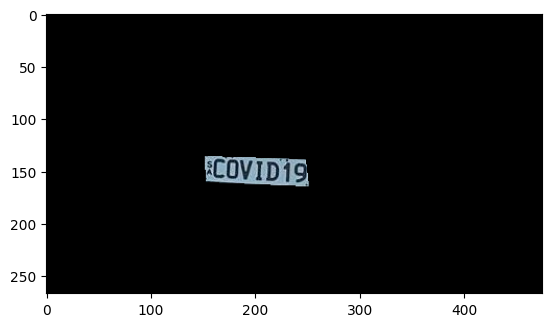

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [12]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

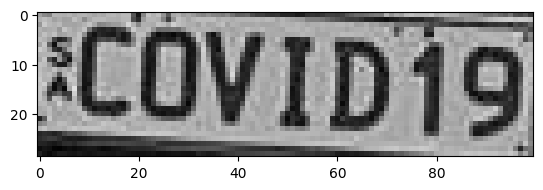

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275641079442608)]

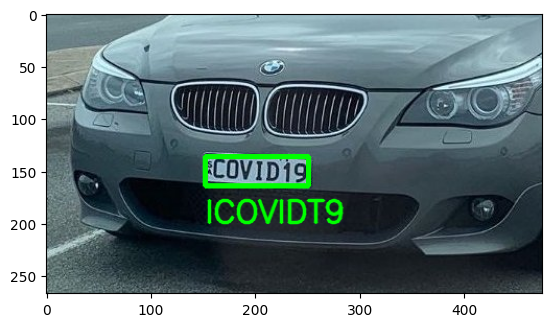

In [15]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))